# Test

In [2]:
cd ../..

C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank


In [3]:
from bandits_to_rank.bandits import *
from bandits_to_rank.environment import *
from bandits_to_rank.referee import *
from bandits_to_rank.opponents import *

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import floor, log
from random import shuffle
from copy import deepcopy


%reload_ext autoreload
%autoreload 2 

### Tests on kappa ordonnée

In [4]:
kappas = [1,0.7,0.5,0.5,0.3]
thetas = [0.9,0.3,0.5,0.4,0.1,0.2,0.5,0.1,0.8,0.4]
nb_prop = len(thetas)
nb_place = len(kappas)
pas = 100
c = 0.5
env = Environment_PBM(thetas,kappas)

part0 = [np.array([uniform(0, 1) for i  in range(nb_prop)]), np.array([1]+[uniform(0, 1) for i  in range(1,nb_place)])]

player_TSMH_part_alea = TS_MH_particule_aleatoire(nb_prop,nb_place,part0,pas)
player_TSMH_base = TS_MH_with_effi(nb_prop,nb_place,part0,pas)## c = 3
player_TSMH_kappa_desord = TS_MH_kappa_desordonne(nb_prop,nb_place,part0,pas)
player_Oracle = Oracle(env.get_best_index())
player_Random = Random(nb_prop,nb_place)



In [5]:
nb_trial = 1000
nb_game = 3
referee_TSMH_part_alea_1000trials_3games = Referee(env,nb_trial)
referee_TSMH_base_1000trials_3games = Referee(env,nb_trial)
referee_TSMH_kappa_desord_1000trials_3games = Referee(env,nb_trial)
referee_Oracle_1000trials_3games = Referee(env,nb_trial)
referee_Random_1000trials_3games = Referee(env,nb_trial)

In [6]:
eff_player_TSMH_part_alea_1000trials_3games=[]
eff_player_base_1000trials_3games=[]
eff_player_kappa_desord_1000trials_3games=[]
for i in range(nb_game):
    print ('#### game '+str(i))
    player_TSMH_part_alea = TS_MH_particule_aleatoire(nb_prop,nb_place,part0,pas)
    player_TSMH_base = TS_MH_with_effi(nb_prop,nb_place,part0,pas)## c = 3
    player_TSMH_kappa_desord = TS_MH_kappa_desordonne(nb_prop,nb_place,part0,pas)
    %time print('TSMH_part_alea ',referee_TSMH_part_alea_1000trials_3games.play_game(player_TSMH_part_alea))
    %time print('TSMH_base',referee_TSMH_base_1000trials_3games.play_game(player_TSMH_base))
    %time print('TSMH_kappa_desord',referee_TSMH_kappa_desord_1000trials_3games.play_game(player_TSMH_kappa_desord))
    %time print ('Oracle', referee_Oracle_1000trials_3games.play_game(player_Oracle))
    %time print('Random',referee_Random_1000trials_3games.play_game(player_Random))
    #print (player_TSMH_p_10.eff[:nb_prop])
    #print (player_TSMH_p_100.eff[:nb_prop])
    eff_player_TSMH_part_alea_1000trials_3games.append(player_TSMH_part_alea.eff)
    eff_player_base_1000trials_3games.append(player_TSMH_base.eff)
    eff_player_kappa_desord_1000trials_3games.append(player_TSMH_kappa_desord.eff)

#### game 0
TSMH_part_alea  0.1200000000000001
Wall time: 2min 11s
TSMH_base 0.050000000000000266
Wall time: 2min 4s
TSMH_kappa_desord 0.020000000000000018
Wall time: 2min 3s
Oracle 0.0
Wall time: 7.98 ms
Random 0.6799999999999999
Wall time: 15 ms
#### game 1
TSMH_part_alea  0.0
Wall time: 2min 6s
TSMH_base 0.0
Wall time: 2min
TSMH_kappa_desord 0.0
Wall time: 2min 4s
Oracle 0.0
Wall time: 6.02 ms
Random 0.8
Wall time: 17 ms
#### game 2
TSMH_part_alea  0.0
Wall time: 2min 9s
TSMH_base 0.06000000000000005
Wall time: 2min 9s
TSMH_kappa_desord 0.020000000000000018
Wall time: 2min 5s
Oracle 0.0
Wall time: 6.95 ms
Random 0.6100000000000001
Wall time: 15 ms


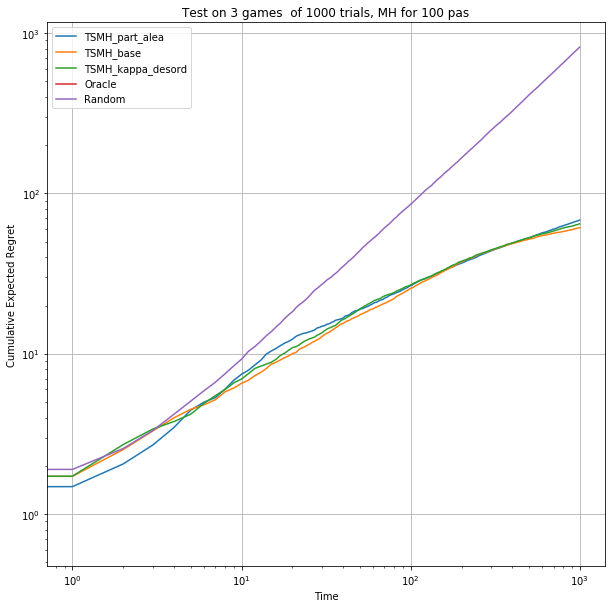

In [12]:
trials = [i for i in range(referee_TSMH_base_1000trials_3games.nb_trials)]
plt.figure(figsize=(10, 10))
plt.plot(trials, np.cumsum(referee_TSMH_part_alea_1000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH_part_alea')
plt.plot(trials, np.cumsum(referee_TSMH_base_1000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH_base')
plt.plot(trials, np.cumsum(referee_TSMH_kappa_desord_1000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH_kappa_desord')

plt.plot(trials, np.cumsum(referee_Oracle_1000trials_3games.get_regret_expected(), axis=0)[trials], label='Oracle')
plt.plot(trials, np.cumsum(referee_Random_1000trials_3games.get_regret_expected(), axis=0)[trials], label='Random')

plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials, MH for '+str(pas)+' pas')
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()
  

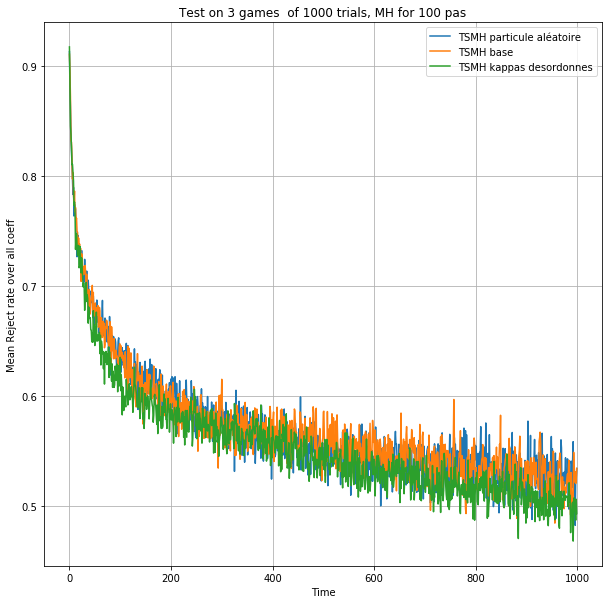

In [13]:
trials = [i for i in range(referee_TSMH_part_alea_1000trials_3games.nb_trials)]
plt.figure(figsize=(10, 10))

plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_TSMH_part_alea_1000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH particule aléatoire')
plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_base_1000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH base')
plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_kappa_desord_1000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH kappas desordonnes')

plt.xlabel('Time')
plt.ylabel('Mean Reject rate over all coeff')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials, MH for '+str(pas)+' pas')
plt.legend()
plt.grid(True)
#plt.loglog()
plt.show()
        

### Tests on kappa desordonnée

### 3 game 1000 trials

In [4]:
kappas = [1,0.7,0.3,0.75,0.1]
thetas = [0.9,0.3,0.5,0.4,0.1,0.2,0.5,0.1,0.8,0.4]
nb_prop = len(thetas)
nb_place = len(kappas)
pas = 100
c = 0.5
env = Environment_PBM(thetas,kappas)

part0 = [np.array([uniform(0, 1) for i  in range(nb_prop)]), np.array([1]+[uniform(0, 1) for i  in range(1,nb_place)])]

player_TSMH_part_alea = TS_MH_particule_aleatoire(nb_prop,nb_place,part0,pas)
player_TSMH_base = TS_MH_with_effi(nb_prop,nb_place,part0,pas)## c = 3
player_TSMH_kappa_desord = TS_MH_particule_aleatoire(nb_prop,nb_place,part0,pas)
player_Oracle = Oracle(env.get_best_index())
player_Random = Random(nb_prop,nb_place)



In [5]:
env.get_best_index()

[0, 6, 2, 8, 9]

In [6]:
nb_trial = 1000
nb_game = 3
referee_TSMH_part_alea_1000trials_3games_kdesord = Referee(env,nb_trial)
referee_TSMH_base_1000trials_3games_kdesord = Referee(env,nb_trial)
referee_TSMH_kappa_desord_1000trials_3games_kdesord = Referee(env,nb_trial)
referee_Oracle_1000trials_3games_kdesord = Referee(env,nb_trial)
referee_Random_1000trials_3games_kdesord = Referee(env,nb_trial)

In [7]:
eff_player_TSMH_part_alea_1000trials_3games_kdesord =[]
eff_player_base_1000trials_3games_kdesord =[]
eff_player_kappa_desord_1000trials_3games_kdesord =[]
for i in range(nb_game):
    print ('#### game '+str(i))
    player_TSMH_part_alea = TS_MH_particule_aleatoire(nb_prop,nb_place,part0,pas)
    player_TSMH_base = TS_MH_with_effi(nb_prop,nb_place,part0,pas)## c = 3
    player_TSMH_kappa_desord = TS_MH_kappa_desordonne(nb_prop,nb_place,part0,pas)
    %time print('TSMH_part_alea ',referee_TSMH_part_alea_1000trials_3games_kdesord.play_game(player_TSMH_part_alea))
    %time print('TSMH_base',referee_TSMH_base_1000trials_3games_kdesord.play_game(player_TSMH_base))
    %time print('TSMH_kappa_desord',referee_TSMH_kappa_desord_1000trials_3games_kdesord.play_game(player_TSMH_kappa_desord))
    %time print ('Oracle', referee_Oracle_1000trials_3games_kdesord.play_game(player_Oracle))
    %time print('Random',referee_Random_1000trials_3games_kdesord.play_game(player_Random))
    #print (player_TSMH_p_10.eff[:nb_prop])
    #print (player_TSMH_p_100.eff[:nb_prop])
    eff_player_TSMH_part_alea_1000trials_3games_kdesord.append(player_TSMH_part_alea.eff)
    eff_player_base_1000trials_3games_kdesord.append(player_TSMH_base.eff)
    eff_player_kappa_desord_1000trials_3games_kdesord.append(player_TSMH_kappa_desord.eff)

#### game 0
TSMH_part_alea  0.015000000000000124
Wall time: 2min 7s
TSMH_base 0.015000000000000124
Wall time: 2min 11s
TSMH_kappa_desord 0.0
Wall time: 2min 20s
Oracle 0.0
Wall time: 6.02 ms
Random 0.33499999999999996
Wall time: 16 ms
#### game 1
TSMH_part_alea  0.015000000000000124
Wall time: 2min 17s
TSMH_base 0.04500000000000015
Wall time: 2min 21s
TSMH_kappa_desord 0.0
Wall time: 2min 30s
Oracle 0.0
Wall time: 11 ms
Random 0.5899999999999999
Wall time: 38.5 ms
#### game 2
TSMH_part_alea  0.15500000000000003
Wall time: 3min 17s
TSMH_base 0.10000000000000009
Wall time: 4h 30min 24s
TSMH_kappa_desord 0.0
Wall time: 2min 16s
Oracle 0.0
Wall time: 11.3 ms
Random 0.97
Wall time: 24.3 ms


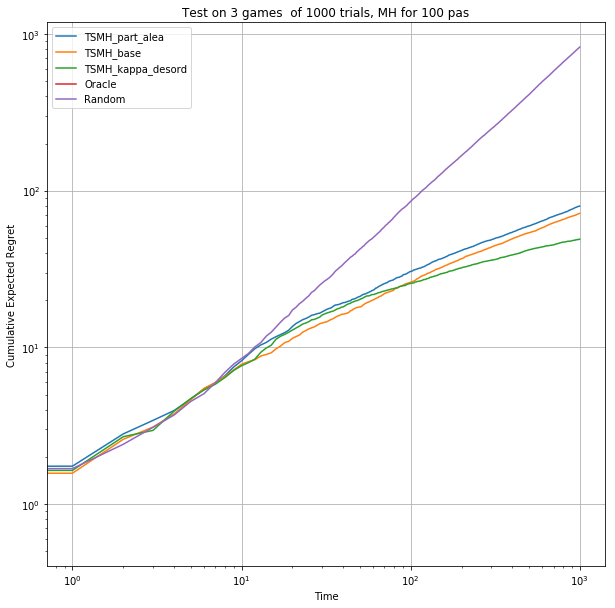

<Figure size 432x288 with 0 Axes>

In [41]:
trials = [i for i in range(referee_TSMH_base_1000trials_3games_kdesord.nb_trials)]
plt.figure(figsize=(10, 10))
plt.plot(trials, np.cumsum(referee_TSMH_part_alea_1000trials_3games_kdesord.get_regret_expected(), axis=0)[trials], label='TSMH_part_alea')
plt.plot(trials, np.cumsum(referee_TSMH_base_1000trials_3games_kdesord.get_regret_expected(), axis=0)[trials], label='TSMH_base')
plt.plot(trials, np.cumsum(referee_TSMH_kappa_desord_1000trials_3games_kdesord.get_regret_expected(), axis=0)[trials], label='TSMH_kappa_desord')

plt.plot(trials, np.cumsum(referee_Oracle_1000trials_3games_kdesord.get_regret_expected(), axis=0)[trials], label='Oracle')
plt.plot(trials, np.cumsum(referee_Random_1000trials_3games_kdesord.get_regret_expected(), axis=0)[trials], label='Random')

plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials, MH for '+str(pas)+' pas')
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()

plt.savefig('5000trials_5games_tests.png', dpi=100) #path_save+'test_pas/graph.png'

        

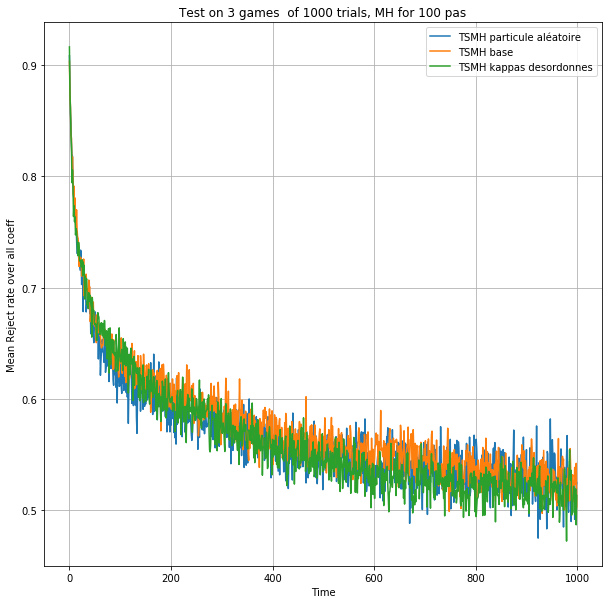

In [42]:
trials = [i for i in range(referee_TSMH_part_alea_1000trials_3games_kdesord.nb_trials)]
plt.figure(figsize=(10, 10))

plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_TSMH_part_alea_1000trials_3games_kdesord),axis=0))[:nb_prop],axis=0)[trials], label='TSMH particule aléatoire')
plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_base_1000trials_3games_kdesord),axis=0))[:nb_prop],axis=0)[trials], label='TSMH base')
plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_kappa_desord_1000trials_3games_kdesord),axis=0))[:nb_prop],axis=0)[trials], label='TSMH kappas desordonnes')

plt.xlabel('Time')
plt.ylabel('Mean Reject rate over all coeff')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials, MH for '+str(pas)+' pas')
plt.legend()
plt.grid(True)
#plt.loglog()
plt.show()
        

### 3 game 5000 trials

In [14]:
kappas = [1,0.7,0.3,0.75,0.1]
thetas = [0.9,0.3,0.5,0.4,0.1,0.2,0.5,0.1,0.8,0.4]
nb_prop = len(thetas)
nb_place = len(kappas)
pas = 100
c = 0.5
env = Environment_PBM(thetas,kappas)

part0 = [np.array([uniform(0, 1) for i  in range(nb_prop)]), np.array([1]+[uniform(0, 1) for i  in range(1,nb_place)])]

player_TSMH_part_alea = TS_MH_particule_aleatoire(nb_prop,nb_place,part0,pas)
player_TSMH_base = TS_MH_with_effi(nb_prop,nb_place,part0,pas)## c = 3
player_TSMH_kappa_desord = TS_MH_particule_aleatoire(nb_prop,nb_place,part0,pas)
player_Oracle = Oracle(env.get_best_index())
player_Random = Random(nb_prop,nb_place)



In [15]:
nb_trial = 5000
nb_game = 3
referee_TSMH_part_alea_5000trials_3games = Referee(env,nb_trial)
referee_TSMH_base_5000trials_3games = Referee(env,nb_trial)
referee_TSMH_kappa_desord_5000trials_3games = Referee(env,nb_trial)
referee_Oracle_5000trials_3games = Referee(env,nb_trial)
referee_Random_5000trials_3games = Referee(env,nb_trial)

In [17]:
eff_player_TSMH_part_alea_5000trials_3games=[]
eff_player_base_5000trials_3games=[]
eff_player_kappa_desord_5000trials_3games=[]
for i in range(nb_game):
    print ('#### game '+str(i))
    player_TSMH_part_alea = TS_MH_particule_aleatoire(nb_prop,nb_place,part0,pas)
    player_TSMH_base = TS_MH_with_effi(nb_prop,nb_place,part0,pas)## c = 3
    player_TSMH_kappa_desord = TS_MH_kappa_desordonne(nb_prop,nb_place,part0,pas)
    %time print('TSMH_part_alea ',referee_TSMH_part_alea_5000trials_3games.play_game(player_TSMH_part_alea))
    %time print('TSMH_base',referee_TSMH_base_5000trials_3games.play_game(player_TSMH_base))
    %time print('TSMH_kappa_desord',referee_TSMH_kappa_desord_5000trials_3games.play_game(player_TSMH_kappa_desord))
    %time print ('Oracle', referee_Oracle_5000trials_3games.play_game(player_Oracle))
    %time print('Random',referee_Random_5000trials_3games.play_game(player_Random))
    #print (player_TSMH_p_10.eff[:nb_prop])
    #print (player_TSMH_p_100.eff[:nb_prop])
    eff_player_TSMH_part_alea_5000trials_3games.append(player_TSMH_part_alea.eff)
    eff_player_base_5000trials_3games.append(player_TSMH_base.eff)
    eff_player_kappa_desord_5000trials_3games.append(player_TSMH_kappa_desord.eff)

#### game 0
TSMH_part_alea  0.015000000000000124
Wall time: 17min 39s
TSMH_base 0.015000000000000124
Wall time: 18min 36s
TSMH_kappa_desord 0.0
Wall time: 21min 11s
Oracle 0.0
Wall time: 65.1 ms
Random 0.78
Wall time: 154 ms
#### game 1
TSMH_part_alea  0.015000000000000124
Wall time: 21min 10s
TSMH_base 0.015000000000000124
Wall time: 17min 55s
TSMH_kappa_desord 0.0
Wall time: 17min 51s
Oracle 0.0
Wall time: 52.7 ms
Random 1.18
Wall time: 123 ms
#### game 2
TSMH_part_alea  0.015000000000000124
Wall time: 17min 46s
TSMH_base 0.015000000000000124
Wall time: 18min
TSMH_kappa_desord 0.0
Wall time: 19min 14s
Oracle 0.0
Wall time: 78 ms
Random 1.375
Wall time: 186 ms


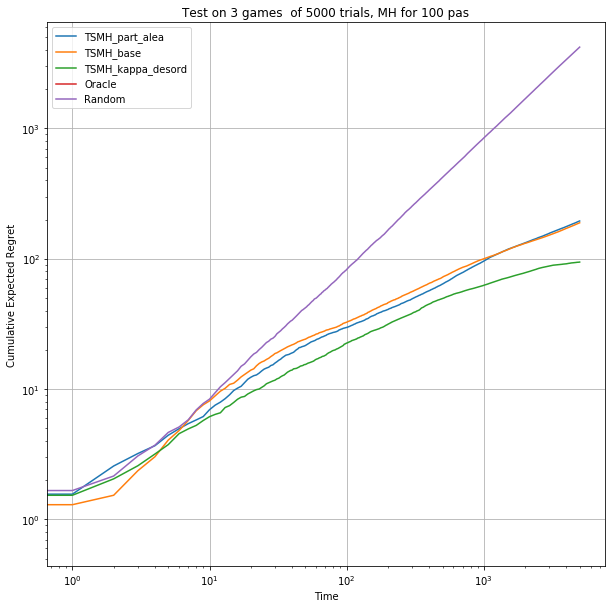

<Figure size 432x288 with 0 Axes>

In [18]:
trials = [i for i in range(referee_TSMH_base_5000trials_3games.nb_trials)]
plt.figure(figsize=(10, 10))
plt.plot(trials, np.cumsum(referee_TSMH_part_alea_5000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH_part_alea')
plt.plot(trials, np.cumsum(referee_TSMH_base_5000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH_base')
plt.plot(trials, np.cumsum(referee_TSMH_kappa_desord_5000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH_kappa_desord')

plt.plot(trials, np.cumsum(referee_Oracle_5000trials_3games.get_regret_expected(), axis=0)[trials], label='Oracle')
plt.plot(trials, np.cumsum(referee_Random_5000trials_3games.get_regret_expected(), axis=0)[trials], label='Random')

plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials, MH for '+str(pas)+' pas')
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()

plt.savefig('5000trials_5games_tests.png', dpi=100) #path_save+'test_pas/graph.png'

        

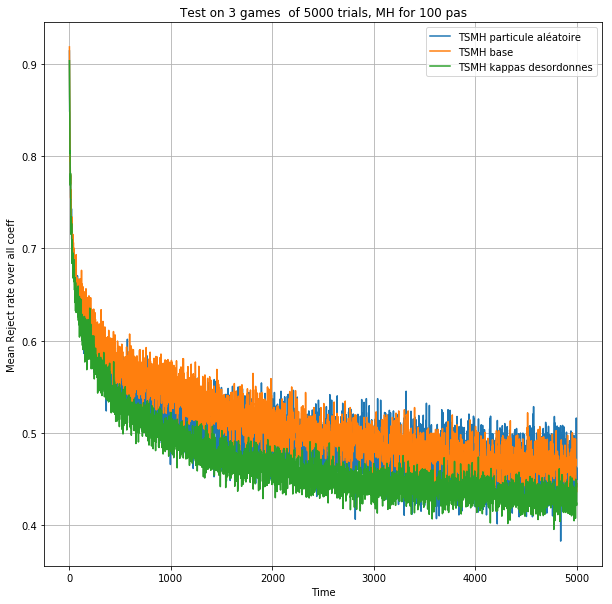

In [19]:
trials = [i for i in range(referee_TSMH_part_alea_5000trials_3games.nb_trials)]
plt.figure(figsize=(10, 10))

plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_TSMH_part_alea_5000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH particule aléatoire')
plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_base_5000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH base')
plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_kappa_desord_5000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH kappas desordonnes')

plt.xlabel('Time')
plt.ylabel('Mean Reject rate over all coeff')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials, MH for '+str(pas)+' pas')
plt.legend()
plt.grid(True)
#plt.loglog()
plt.show()
        

### Record Logs

In [67]:
cd Test/interaction/result/eval_tauxaccept/

C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank\Test\interaction\result\eval_tauxaccept


In [ ]:
referee_TSMH_p_100.get_regret_expected()

In [94]:
dict_regret_for_tauxaccept_1000trials_3games = {'TSMH_p_100':list(referee_TSMH_p_100.get_regret_expected()),
 'TSMH_p_10':list(referee_TSMH_p_10.get_regret_expected())}

dict_tauxaccept_for_tauxaccept_1000trials_3games = {'TSMH_p_100':list(eff_player_100_1000trials_3games),
 'TSMH_p_10':list(eff_player_10_1000trials_3games))}



In [95]:
with open('referee_TSMH_AR_p_100_1000trials_3games.txt', 'w') as file:
    json.dump(referee_TSMH_p_100.record_results, file)
with open('referee_TSMH_AR_p_10_1000trials_3games.txt', 'w') as file:
    json.dump(referee_TSMH_p_10.record_results, file)
with open('regret_for_tauxaccept_1000trials_3games.txt', 'w') as file:
    json.dump(dict_regret_for_tauxaccept_1000trials_3games, file) 
with open('dict_for_tauxaccept_1000trials_3games.txt', 'w') as file:
    json.dump(dict_for_tauxaccept_1000trials_3games, file) 
    

TypeError: Object of type ndarray is not JSON serializable

In [46]:
dict_regret_vari_pas_1000trials_3games = {'TSMH_p_100':list(referee_TSMH.get_regret_expected()),
 'TSMH_p_10':list(referee_TSMH_10.get_regret_expected()),
 'TSMH_p_1000':list(referee_TSMH_1000.get_regret_expected()),
 'E_greedy':list(referee_E_greedy.get_regret_expected()),
 'TS':list(referee_TS.get_regret_expected())}


In [47]:
with open('referee_TSMH_p_100_1000trials_3games.txt', 'w') as file:
    json.dump(referee_TSMH.record_results, file)
with open('referee_TSMH_p_10_1000trials_3games.txt', 'w') as file:
    json.dump(referee_TSMH_10.record_results, file)
with open('referee_TSMH_p_1000_1000trials_3games.txt', 'w') as file:
    json.dump(referee_TSMH_1000.record_results, file)
with open('referee_E_greedy_1000trials_3game.txt', 'w') as file:
    json.dump(referee_E_greedy.record_results, file)
with open('referee_TS_1000trials_3game.txt', 'w') as file:
    json.dump(referee_TS.record_results, file)
with open('regret_vari_pas_1000trials_3games.txt', 'w') as file:
    json.dump(dict_regret_vari_pas_1000trials_3games, file)

